In [1]:
! pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.1/131.1 kB 672.5 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 697.8 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 3.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.2/346.2 kB 2.2 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 774.0/774.0 kB 4.1 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 4.0 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 3.8 MB/s eta 0:00:0000:0100:01m


In [2]:
! pip install pillow

  Using cached pillow-10.2.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (9.7 kB)
Using cached pillow-10.2.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.4 MB)


In [7]:
! git clone https://github.com/LiheYoung/Depth-Anything

Cloning into 'Depth-Anything'...
remote: Enumerating objects: 406, done.
remote: Counting objects: 100% (141/141), done.
remote: Compressing objects: 100% (114/114), done.
remote: Total 406 (delta 76), reused 71 (delta 27), pack-reused 265
Receiving objects: 100% (406/406), 237.89 MiB | 4.94 MiB/s, done.
Resolving deltas: 100% (128/128), done.


In [8]:
! cd Depth-Anything

In [10]:
! pip install -r Depth-Anything/requirements.txt

  Preparing metadata (setup.py) ... done
  Using cached matplotlib-3.8.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.4/84.4 kB 10.4 MB/s eta 0:00:00
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvjitlink_cu12-12.3.101-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached contourpy-1.2.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.49.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (159 kB)
  Using cached kiwisolver-1.4.5-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl.metadata (6.4 kB)
  Using cached pyparsing-3.1.1-py3-none-any.whl.metadata (5.1 kB)
  Using cached pytz-2024.1-py2.py3-none-any.whl.me

In [6]:
import numpy as np
from PIL import Image
import cv2
import torch

In [13]:
from depth_anything.dpt import DepthAnything
from depth_anything.util.transform import Resize, NormalizeImage, PrepareForNet
from torchvision.transforms import Compose

In [14]:
model = DepthAnything.from_pretrained("LiheYoung/depth_anything_vitl14")

xFormers not available
xFormers not available


In [15]:
transform = Compose([
        Resize(
            width=518,
            height=518,
            resize_target=False,
            keep_aspect_ratio=True,
            ensure_multiple_of=14,
            resize_method='lower_bound',
            image_interpolation_method=cv2.INTER_CUBIC,
        ),
        NormalizeImage(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        PrepareForNet(),
    ])

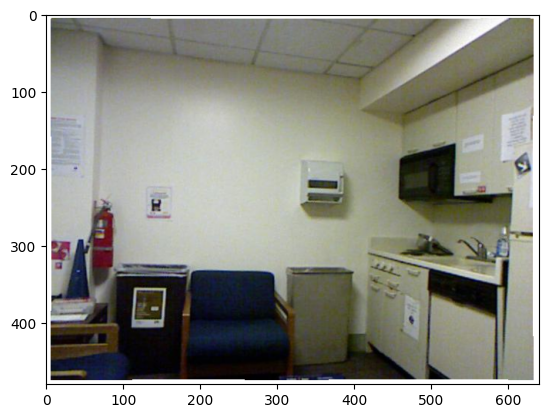

In [247]:
image = Image.open("../../datasets/nyu_data/data/nyu2_test/00000_colors.png")
# displaying the blurred image using matplotlib
import matplotlib.pyplot as plt
plt.imshow(image)
plt.show()
# min max normalization
image = np.array(image)
image = (image - image.min()) / (image.max() - image.min())
image = transform({'image': image})['image']
image = torch.from_numpy(image).unsqueeze(0)

depth = model(image)

In [248]:
print(depth)

tensor([[[ 82.2470,  82.4090,  80.9212,  ..., 162.1217, 160.5062, 118.4988],
         [ 82.3879,  81.8137,  81.2565,  ..., 161.3816, 161.1472, 156.1608],
         [ 81.4402,  81.3104,  80.5361,  ..., 160.4008, 160.2913, 159.9210],
         ...,
         [197.8570, 195.4746, 195.1352,  ..., 182.4320, 182.9017, 183.9114],
         [196.9527, 197.5818, 194.6139,  ..., 182.9984, 183.1273, 184.0491],
         [160.9394, 192.6246, 196.0274,  ..., 182.3948, 183.4583, 166.2797]]],
       grad_fn=<SqueezeBackward1>)


In [249]:
# displaying the depth
depth = depth.squeeze(0).detach().cpu().numpy()
depth = (depth - depth.min()) / (depth.max() - depth.min())
depth = (depth * 255).astype(np.uint8)
depth = Image.fromarray(depth)

In [250]:
print(depth)

<PIL.Image.Image image mode=L size=686x518 at 0x7F1BD153F1F0>


In [251]:
# displaying min max and mean of the depth
print(np.array(depth).min(), np.array(depth).max(), np.array(depth).mean())

0 255 60.33337460742708


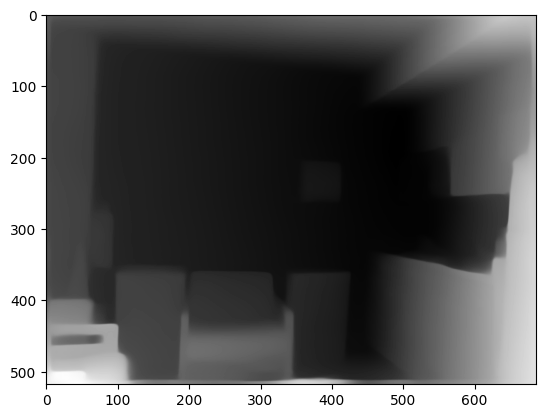

In [252]:
# displaying depth using matplotlib
import matplotlib.pyplot as plt
plt.imshow(depth, cmap='gray')
plt.show()

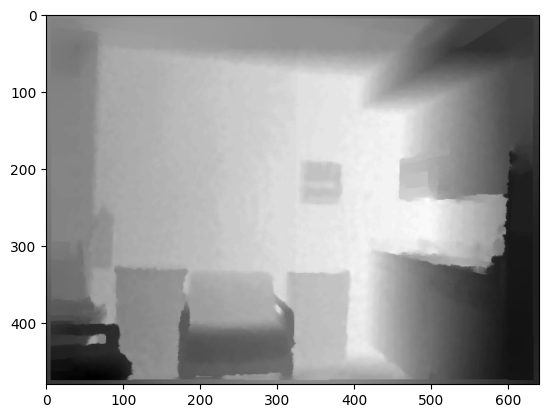

In [253]:
# displaying the ground truth depth map in matplotlib
ground_truth = Image.open("../../datasets/nyu_data/data/nyu2_test/00000_depth.png")
ground_truth = np.array(ground_truth)
plt.imshow(ground_truth, cmap='gray')
plt.show()

In [254]:
print(ground_truth)

[[2752 2752 2752 ... 2242 2242 2242]
 [2751 2752 2752 ... 2242 2242 2242]
 [2751 2751 2752 ... 2242 2242 2242]
 ...
 [2198 2198 2197 ... 2081 2081 2080]
 [2197 2197 2197 ... 2081 2081 2081]
 [2197 2197 2197 ... 2081 2081 2081]]


In [255]:
# displaying min max and mean of the ground truth depth
print(ground_truth.min(), ground_truth.max(), ground_truth.mean())

1798 3615 2879.06521484375


In [256]:
# getting the shapes of image,depth and ground truth
print(np.array(image).shape, np.array(depth).shape, ground_truth.shape)

(1, 3, 518, 686) (518, 686) (480, 640)


In [257]:
# reshaping the depth and ground truth to 518x686
depth = depth.resize((686, 518))
ground_truth = Image.fromarray(ground_truth).resize((686, 518))

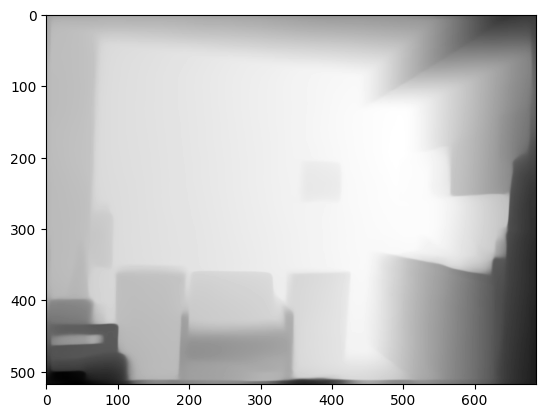

In [258]:
# inverting the depth and displaying it
depth = np.array(depth)
depth = 255 - depth
plt.imshow(depth, cmap='gray')
plt.show()

In [259]:
# min max normalizing both images to be between 0 and 1
depth = (depth - depth.min())/(depth.max() - depth.min())
ground_truth = np.array(ground_truth)
ground_truth  = (ground_truth - ground_truth.min())/(ground_truth.max() - ground_truth.min())

In [260]:
# displaying min max and mean of the ground truth depth
print(ground_truth.min(), ground_truth.max(), ground_truth.mean())

0.0 1.0 0.6000360348296098


In [261]:
# displaying min max and mean of the depth
print(np.array(depth).min(), np.array(depth).max(), np.array(depth).mean())

0.0 1.0 0.7633985309512664


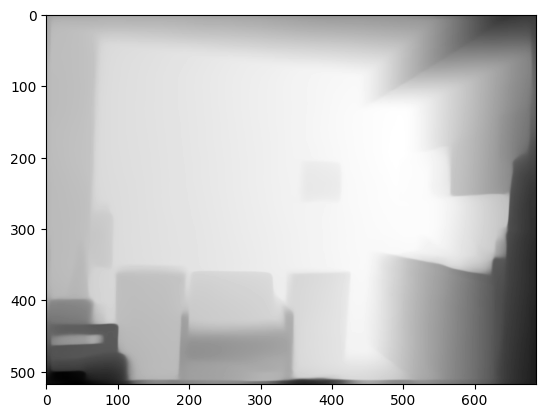

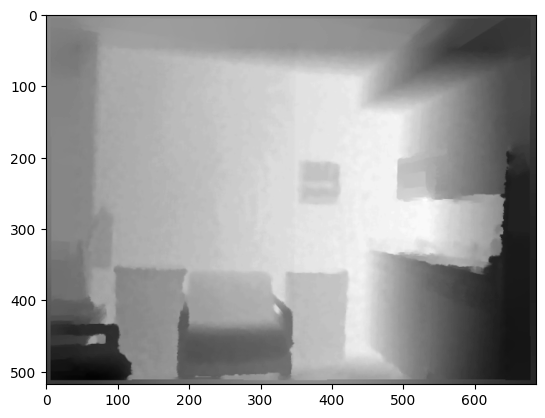

In [262]:
# displaying the depth and ground truth using matplotlib
plt.imshow(depth, cmap='gray')
plt.show()
plt.imshow(ground_truth, cmap='gray')
plt.show()

In [263]:
# now we will take the mean squared error between the depth and ground truth
mse = np.mean((depth - ground_truth) ** 2)
print(mse)

0.03267138326260485


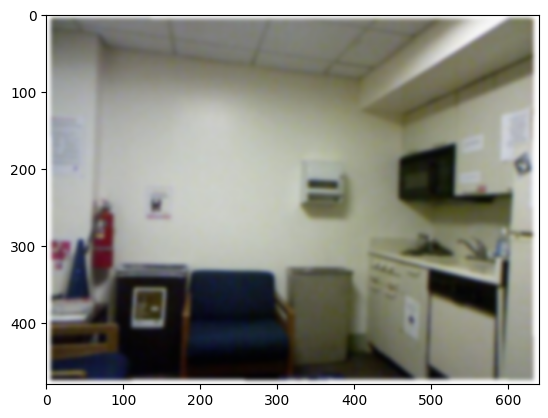

In [264]:
# adding blur to the image
image = Image.open("../../datasets/nyu_data/data/nyu2_test/00000_colors.png")
image = np.array(image)
image = cv2.GaussianBlur(image, (15, 15), 0)
image = Image.fromarray(image)
# displaying the blurred image using matplotlib
plt.imshow(image)
plt.show()

In [265]:
# inference on the blurred image
image = np.array(image)
image = (image - image.min()) / (image.max() - image.min())
image = transform({'image': image})['image']
image = torch.from_numpy(image).unsqueeze(0)

blur_depth = model(image)

In [266]:
# displaying the depth
blur_depth = blur_depth.squeeze(0).detach().cpu().numpy()
blur_depth = (blur_depth - blur_depth.min()) / (blur_depth.max() - blur_depth.min())
blur_depth = (blur_depth * 255).astype(np.uint8)
blur_depth = Image.fromarray(blur_depth)

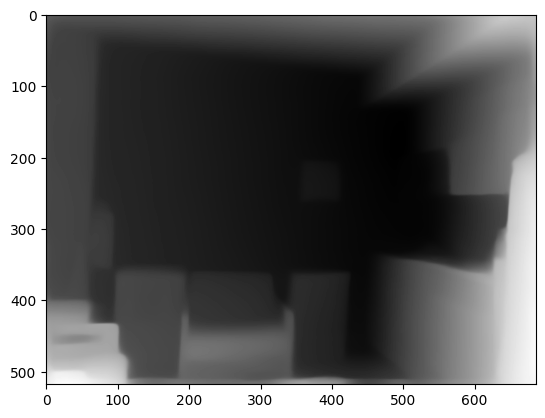

In [267]:
# displaying depth using matplotlib
import matplotlib.pyplot as plt
plt.imshow(blur_depth, cmap='gray')
plt.show()

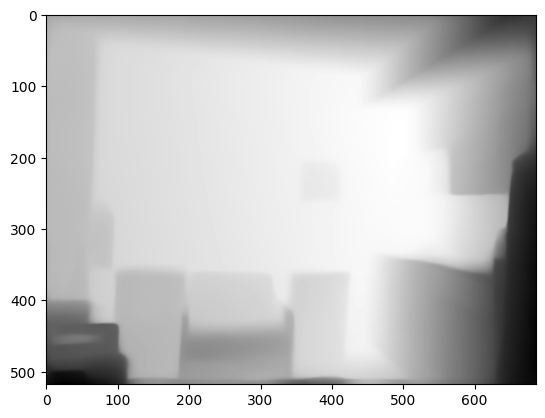

In [268]:
# inverting the depth and displaying it
blur_depth = np.array(blur_depth)
blur_depth = 255 - blur_depth
plt.imshow(blur_depth, cmap='gray')
plt.show()

In [269]:
print(blur_depth)

[[163 163 163 ...  57  58 109]
 [163 163 164 ...  57  58  62]
 [164 164 164 ...  59  58  58]
 ...
 [ 18  18  17 ...   9   9   7]
 [ 14  17  17 ...   8   8   6]
 [ 51  15  14 ...   8   6  29]]


In [270]:
# min max normalizing images to be between 0 and 1
blur_depth = (blur_depth - blur_depth.min())/(blur_depth.max() - blur_depth.min())

In [271]:
blur_depth.shape

(518, 686)

In [272]:
ground_truth.shape

(518, 686)

In [273]:
# taking the mean squared error between the depth and ground truth
blur_depth = np.array(blur_depth)
ground_truth = np.array(ground_truth)
mse = np.mean((blur_depth - ground_truth) ** 2)
print(mse)

0.028119625178895942


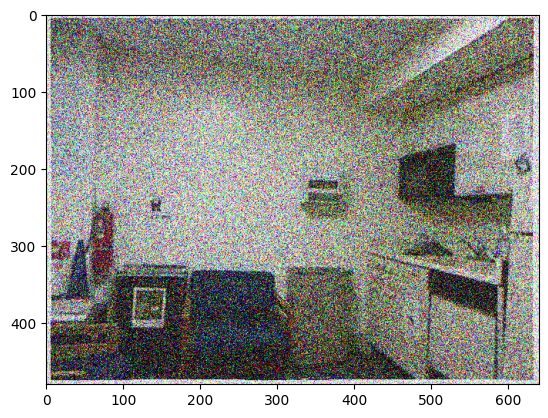

In [274]:
# adding noise to the image
image = Image.open("../../datasets/nyu_data/data/nyu2_test/00000_colors.png")
image = np.array(image)
# min max normalization
image = (image - image.min()) / (image.max() - image.min())
# adding gaussian noise
noise = np.random.normal(0, 0.4, image.shape)
image = image + noise
image = np.clip(image, 0, 1)
image = Image.fromarray((image * 255).astype(np.uint8))
# displaying the noisy image using matplotlib
plt.imshow(image)
plt.show()

In [275]:
# inference on the noisy image
image = np.array(image)
image = (image- image.min())/(image.max() - image.min())
image = transform({'image': image})['image']
image = torch.from_numpy(image).unsqueeze(0)

In [276]:
# inference on the noisy image
noise_depth = model(image)

In [277]:
# displaying the depth
noise_depth = noise_depth.squeeze(0).detach().cpu().numpy()
noise_depth = (noise_depth - noise_depth.min()) / (noise_depth.max() - noise_depth.min())
noise_depth = (noise_depth * 255).astype(np.uint8)
noise_depth = Image.fromarray(noise_depth)

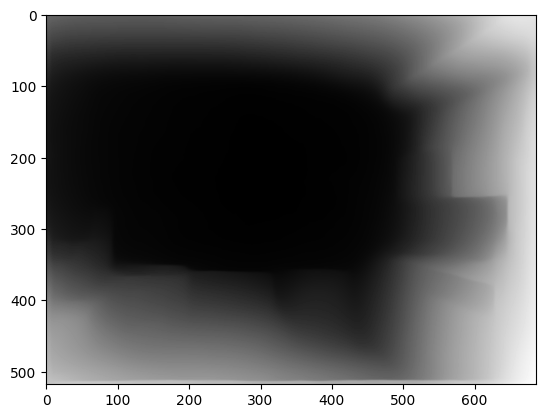

In [278]:
# displaying depth using matplotlib
import matplotlib.pyplot as plt
plt.imshow(noise_depth, cmap='gray')
plt.show()

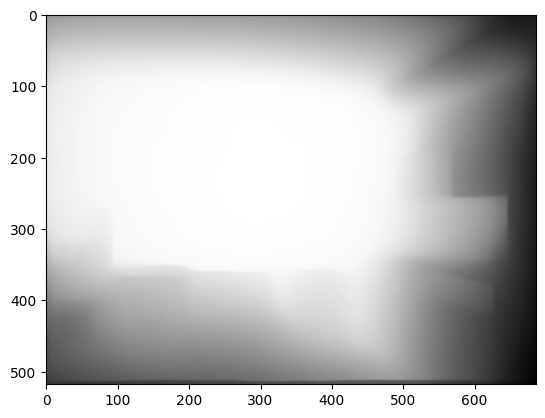

In [279]:
# inverting the depth and displaying it
noise_depth = np.array(noise_depth)
noise_depth = 255 - noise_depth
plt.imshow(noise_depth, cmap='gray')
plt.show()

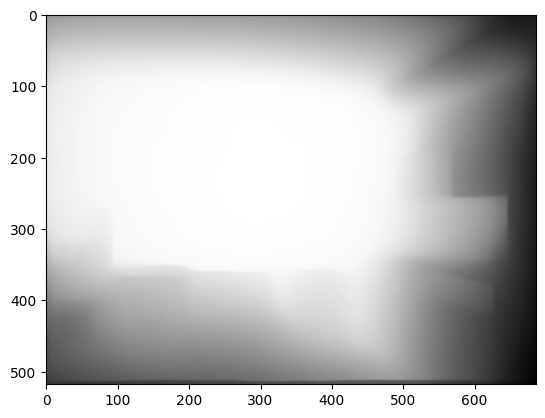

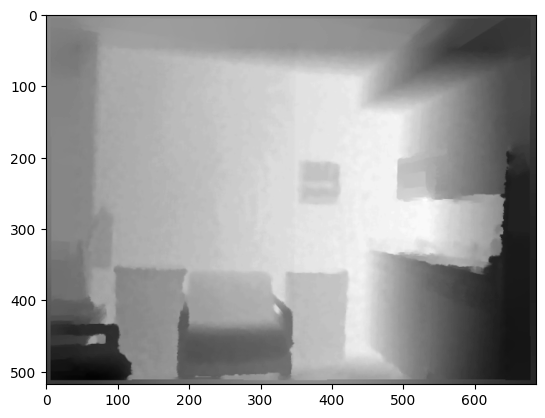

In [280]:
# min max normalizing both images to be between 0 and 1
noise_depth = (noise_depth - noise_depth.min())/(noise_depth.max() - noise_depth.min())
# displaying the depth and ground truth using matplotlib
plt.imshow(noise_depth, cmap='gray')
plt.show()
plt.imshow(ground_truth, cmap='gray')
plt.show()

In [281]:
# taking the mean squared error between the depth and ground truth
noise_depth = np.array(noise_depth)
ground_truth = np.array(ground_truth)
mse = np.mean((noise_depth - ground_truth) ** 2)
print(mse)

0.035107813543239566


In [282]:
# loading the nyu depth v2 dataset csv file
import pandas as pd
df = pd.read_csv("../../datasets/nyu_data/data/nyu2_test.csv")

In [283]:
df.head()

,0,1
0,data/nyu2_test/00000_colors.png,data/nyu2_test/00000_depth.png
1,data/nyu2_test/00001_colors.png,data/nyu2_test/00001_depth.png
2,data/nyu2_test/00008_colors.png,data/nyu2_test/00008_depth.png
3,data/nyu2_test/00013_colors.png,data/nyu2_test/00013_depth.png
4,data/nyu2_test/00014_colors.png,data/nyu2_test/00014_depth.png


In [284]:
# adding ../../datasets/nyu_data/ to the image paths
df['0'] = "../../datasets/nyu_data/" + df['0']
df['1'] = "../../datasets/nyu_data/" + df['1']

In [285]:
# displaying the dataframe
df.head()

,0,1
0,../../datasets/nyu_data/data/nyu2_test/00000_c...,../../datasets/nyu_data/data/nyu2_test/00000_d...
1,../../datasets/nyu_data/data/nyu2_test/00001_c...,../../datasets/nyu_data/data/nyu2_test/00001_d...
2,../../datasets/nyu_data/data/nyu2_test/00008_c...,../../datasets/nyu_data/data/nyu2_test/00008_d...
3,../../datasets/nyu_data/data/nyu2_test/00013_c...,../../datasets/nyu_data/data/nyu2_test/00013_d...
4,../../datasets/nyu_data/data/nyu2_test/00014_c...,../../datasets/nyu_data/data/nyu2_test/00014_d...


In [296]:
# writing a function to calculate the mean squared error of an image given its path
def mse(image_path):
    image = Image.open(image_path)
    image = np.array(image)
    image = (image - image.min()) / (image.max() - image.min())
    image = transform({'image': image})['image']
    image = torch.from_numpy(image).unsqueeze(0)
    depth = model(image)
    depth = depth.squeeze(0).detach().cpu().numpy()
    depth = (depth - depth.min()) / (depth.max() - depth.min())
    depth = (depth * 255).astype(np.uint8)
    depth = Image.fromarray(depth)
    depth = np.array(depth)
    depth = 255 - depth
    depth = (depth - depth.min())/(depth.max() - depth.min())
    ground_truth = Image.open(image_path.replace("colors", "depth"))
    ground_truth = np.array(ground_truth)
    ground_truth = Image.fromarray(ground_truth).resize((686, 518))
    ground_truth = np.array(ground_truth)
    ground_truth  = (ground_truth - ground_truth.min())/(ground_truth.max() - ground_truth.min())
    mse = np.mean((depth - ground_truth) ** 2)
    return mse

In [301]:
# calculating the mean squared of error of all the images in the dataframe and putting it in a row
# also using the tqdm library to display a progress bar
from tqdm import tqdm
mse_list = []
for i in tqdm(range(len(df))):
    mse_list.append(mse(df['0'][i]))

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 654/654 [36:55<00:00,  3.39s/it]


In [302]:
# adding the mse_list to the dataframe
df['mse'] = mse_list

In [303]:
# displaying the dataframe
df.head()

,0,1,mse
0,../../datasets/nyu_data/data/nyu2_test/00000_c...,../../datasets/nyu_data/data/nyu2_test/00000_d...,0.032671
1,../../datasets/nyu_data/data/nyu2_test/00001_c...,../../datasets/nyu_data/data/nyu2_test/00001_d...,0.039232
2,../../datasets/nyu_data/data/nyu2_test/00008_c...,../../datasets/nyu_data/data/nyu2_test/00008_d...,0.121114
3,../../datasets/nyu_data/data/nyu2_test/00013_c...,../../datasets/nyu_data/data/nyu2_test/00013_d...,0.042596
4,../../datasets/nyu_data/data/nyu2_test/00014_c...,../../datasets/nyu_data/data/nyu2_test/00014_d...,0.176253


In [305]:
# saving the dataframe to a csv file
df.to_csv("../../datasets/nyu_data/data/nyu2_test_mse.csv", index=False)

In [308]:
# writing a function to calculate the mean squared error of an image given its path by adding a blur to the image
def mse_blur(image_path):
    image = Image.open(image_path)
    image = np.array(image)
    image = cv2.GaussianBlur(image, (15, 15), 0)
    image = Image.fromarray(image)
    image = np.array(image)
    image = (image - image.min()) / (image.max() - image.min())
    image = transform({'image': image})['image']
    image = torch.from_numpy(image).unsqueeze(0)
    depth = model(image)
    depth = depth.squeeze(0).detach().cpu().numpy()
    depth = (depth - depth.min()) / (depth.max() - depth.min())
    depth = (depth * 255).astype(np.uint8)
    depth = Image.fromarray(depth)
    depth = np.array(depth)
    depth = 255 - depth
    depth = (depth - depth.min())/(depth.max() - depth.min())
    ground_truth = Image.open(image_path.replace("colors", "depth"))
    ground_truth = np.array(ground_truth)
    ground_truth = Image.fromarray(ground_truth).resize((686, 518))
    ground_truth = np.array(ground_truth)
    ground_truth  = (ground_truth - ground_truth.min())/(ground_truth.max() - ground_truth.min())
    mse = np.mean((depth - ground_truth) ** 2)
    return mse

In [309]:
# calculating the mean squared of error of all the images in the dataframe and putting it in a row
# also using the tqdm library to display a progress bar
from tqdm import tqdm
mse_list = []
for i in tqdm(range(len(df))):
    mse_list.append(mse_blur(df['0'][i]))

100%|█████████████████████████████████████████| 654/654 [38:43<00:00,  3.55s/it]


In [ ]:
# checking whether gpu is available for pytorch
torch.cuda.is_available()

In [310]:
# appending the mse_list to the dataframe
df['mse_blur_15_15'] = mse_list

In [311]:
# displaying the dataframe
df.head()

,0,1,mse,mse_blur_15_15
0,../../datasets/nyu_data/data/nyu2_test/00000_c...,../../datasets/nyu_data/data/nyu2_test/00000_d...,0.032671,0.028120
1,../../datasets/nyu_data/data/nyu2_test/00001_c...,../../datasets/nyu_data/data/nyu2_test/00001_d...,0.039232,0.042028
2,../../datasets/nyu_data/data/nyu2_test/00008_c...,../../datasets/nyu_data/data/nyu2_test/00008_d...,0.121114,0.113433
3,../../datasets/nyu_data/data/nyu2_test/00013_c...,../../datasets/nyu_data/data/nyu2_test/00013_d...,0.042596,0.050179
4,../../datasets/nyu_data/data/nyu2_test/00014_c...,../../datasets/nyu_data/data/nyu2_test/00014_d...,0.176253,0.152605


In [312]:
# calculating the mean squared error of an image given its path by adding noise to the image
def mse_noise(image_path):
    image = Image.open(image_path)
    image = np.array(image)
    noise = np.random.normal(0, 0.4, image.shape)
    image = image + noise
    image = np.clip(image, 0, 1)
    image = Image.fromarray((image * 255).astype(np.uint8))
    image = np.array(image)
    image = (image- image.min())/(image.max() - image.min())
    image = transform({'image': image})['image']
    image = torch.from_numpy(image).unsqueeze(0)
    depth = model(image)
    depth = depth.squeeze(0).detach().cpu().numpy()
    depth = (depth - depth.min()) / (depth.max() - depth.min())
    depth = (depth * 255).astype(np.uint8)
    depth = Image.fromarray(depth)
    depth = np.array(depth)
    depth = 255 - depth
    depth = (depth - depth.min())/(depth.max() - depth.min())
    ground_truth = Image.open(image_path.replace("colors", "depth"))
    ground_truth = np.array(ground_truth)
    ground_truth = Image.fromarray(ground_truth).resize((686, 518))
    ground_truth = np.array(ground_truth)
    ground_truth  = (ground_truth - ground_truth.min())/(ground_truth.max() - ground_truth.min())
    mse = np.mean((depth - ground_truth) ** 2)
    return mse

In [ ]:
# calculating the mean squared of error of all the images in the dataframe and putting it in a row
# also using the tqdm library to display a progress bar
from tqdm import tqdm
mse_list = []
for i in tqdm(range(len(df))):
    mse_list.append(mse_noise(df['0'][i]))

 64%|██████████████████████████               | 416/654 [25:04<14:27,  3.64s/it]

In [ ]:
# appending the mse_list to the dataframe
df['mse_noise_0_4'] = mse_list

In [318]:
# displaying the dataframe
df.head()

,0,1,mse,mse_blur_15_15,mse_noise_0_4
0,../../datasets/nyu_data/data/nyu2_test/00000_c...,../../datasets/nyu_data/data/nyu2_test/00000_d...,0.032671,0.028120,0.044422
1,../../datasets/nyu_data/data/nyu2_test/00001_c...,../../datasets/nyu_data/data/nyu2_test/00001_d...,0.039232,0.042028,0.041130
2,../../datasets/nyu_data/data/nyu2_test/00008_c...,../../datasets/nyu_data/data/nyu2_test/00008_d...,0.121114,0.113433,0.192939
3,../../datasets/nyu_data/data/nyu2_test/00013_c...,../../datasets/nyu_data/data/nyu2_test/00013_d...,0.042596,0.050179,0.050338
4,../../datasets/nyu_data/data/nyu2_test/00014_c...,../../datasets/nyu_data/data/nyu2_test/00014_d...,0.176253,0.152605,0.255789


In [ ]:
# saving the dataframe to a csv file
df.to_csv("../../datasets/nyu_data/data/nyu2_test_mse.csv", index=False)

In [319]:
# getting the mean of the mse columns
print(df['mse'].mean(), df['mse_blur_15_15'].mean(), df['mse_noise_0_4'].mean())

0.09788083069435145 0.09426525606132176 0.10870918774462596


In [320]:
! pip install image-quality

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 479.8 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.6/170.6 kB 926.7 kB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.6/146.6 kB 756.0 kB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 55.3 kB/s eta 0:00:0000:0100:07
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 70.5 kB/s eta 0:00:0000:0100:13m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.4/313.4 kB 58.1 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 55.4 kB/s eta 0:00:00a 0:00:01
  Created wheel for libsvm: filename=libsvm-3.23.0.4-cp310-cp310-linux_x86_64.whl size=182782 sha256=eed0f8a7e9accca91a27a9d7baa1c6f897bb1db2a66803a8fc47832ff61cb257
  Stored in directory: /home/cs20b1006/.cache/pip/wheels/79/c7/19/a8c85928f8e629654b8e1adb3c8091f0bb77344d0ee9954a85
Successfully built libsvm


In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("../../datasets/nyu_data/data/nyu2_test_mse.csv")

In [ ]:
import imquality.brisque as brisque

# calculating the brisque score of an image given its path
def brisque_score(image_path):
    image = Image.open(image_path)
    score = brisque.score(image)
    return score

# calculating the brisque score of all the images in the dataframe and putting it in a row
# also using the tqdm library to display a progress bar
from tqdm import tqdm
brisque_list = []
for i in tqdm(range(len(df))):
    brisque_list.append(brisque_score(df['0'][i]))

In [8]:
! pip install piq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.9/106.9 kB 346.7 kB/s eta 0:00:00a 0:00:01


In [17]:
import torch
from piq import brisque

# calculating the brisque score of an image given its path
def brisque_score(image_path):
    image = Image.open(image_path)
    image = np.array(image)
    image_tensor = torch.from_numpy(image).permute(2, 0, 1).unsqueeze(0).float() / 255.0
    # Move tensor to the appropriate device (CPU or GPU if available)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    image_tensor = image_tensor.to(device)
    # Calculate the BRISQUE score
    with torch.no_grad():  # Optionally disable gradient calculation
        brisque_score = brisque(image_tensor, data_range=1.0)
        return brisque_score.item()
# calculating the brisque score of all the images in the dataframe and putting it in a row
# also using the tqdm library to display a progress bar
from tqdm import tqdm
brisque_list = []
for i in tqdm(range(len(df))):
    brisque_list.append(brisque_score(df['0'][i]))

  0%|                                                                                                                                                     | 0/654 [00:00<?, ?it/s]/home/cs20b1006/miniconda3/envs/GO_IQA_DE_CNN/lib/python3.10/site-packages/torch/cuda/__init__.py:141: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 11040). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0
Downloading: "https://github.com/photosynthesis-team/piq/releases/download/v0.4.0/brisque_svm_weights.pt" to /home/cs20b1006/.cache/torch/hub/checkpoints/brisque_svm_weights.pt

  0%|                                                                   

In [18]:
# appending the brisque_list_normal to the dataframe
df['brisque_list_normal'] = brisque_list

In [19]:
# displaying the dataframe
df.head()

,0,1,mse,mse_blur_15_15,mse_noise_0_4,brisque_list_normal
0,../../datasets/nyu_data/data/nyu2_test/00000_c...,../../datasets/nyu_data/data/nyu2_test/00000_d...,0.032671,0.028120,0.044422,33.232971
1,../../datasets/nyu_data/data/nyu2_test/00001_c...,../../datasets/nyu_data/data/nyu2_test/00001_d...,0.039232,0.042028,0.041130,27.937988
2,../../datasets/nyu_data/data/nyu2_test/00008_c...,../../datasets/nyu_data/data/nyu2_test/00008_d...,0.121114,0.113433,0.192939,33.188110
3,../../datasets/nyu_data/data/nyu2_test/00013_c...,../../datasets/nyu_data/data/nyu2_test/00013_d...,0.042596,0.050179,0.050338,36.757263
4,../../datasets/nyu_data/data/nyu2_test/00014_c...,../../datasets/nyu_data/data/nyu2_test/00014_d...,0.176253,0.152605,0.255789,38.382019


In [20]:
# calculating the brisque score of an image given its path by adding a blur to the image
def brisque_score_blur(image_path):
    image = Image.open(image_path)
    image = np.array(image)
    image = cv2.GaussianBlur(image, (15, 15), 0)
    image = Image.fromarray(image)
    image = np.array(image)
    image_tensor = torch.from_numpy(image).permute(2, 0, 1).unsqueeze(0).float() / 255.0
    # Move tensor to the appropriate device (CPU or GPU if available)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    image_tensor = image_tensor.to(device)
    # Calculate the BRISQUE score
    with torch.no_grad():  # Optionally disable gradient calculation
        brisque_score = brisque(image_tensor, data_range=1.0)
        return brisque_score.item()
# calculating the brisque score of all the images in the dataframe and putting it in a row
# also using the tqdm library to display a progress bar
from tqdm import tqdm
brisque_list = []
for i in tqdm(range(len(df))):
    brisque_list.append(brisque_score_blur(df['0'][i]))

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 654/654 [00:26<00:00, 24.80it/s]


In [21]:
# appending the brisque_list_blur to the dataframe
df['brisque_list_blur'] = brisque_list

In [22]:
# displaying the dataframe
df.head()

,0,1,mse,mse_blur_15_15,mse_noise_0_4,brisque_list_normal,brisque_list_blur
0,../../datasets/nyu_data/data/nyu2_test/00000_c...,../../datasets/nyu_data/data/nyu2_test/00000_d...,0.032671,0.028120,0.044422,33.232971,67.826111
1,../../datasets/nyu_data/data/nyu2_test/00001_c...,../../datasets/nyu_data/data/nyu2_test/00001_d...,0.039232,0.042028,0.041130,27.937988,67.981995
2,../../datasets/nyu_data/data/nyu2_test/00008_c...,../../datasets/nyu_data/data/nyu2_test/00008_d...,0.121114,0.113433,0.192939,33.188110,67.569031
3,../../datasets/nyu_data/data/nyu2_test/00013_c...,../../datasets/nyu_data/data/nyu2_test/00013_d...,0.042596,0.050179,0.050338,36.757263,66.950745
4,../../datasets/nyu_data/data/nyu2_test/00014_c...,../../datasets/nyu_data/data/nyu2_test/00014_d...,0.176253,0.152605,0.255789,38.382019,67.790894


In [23]:
# calculating the brisque score of an image given its path by adding noise to the image
def brisque_score_noise(image_path):
    image = Image.open(image_path)
    image = np.array(image)
    noise = np.random.normal(0, 0.4, image.shape)
    image = image + noise
    image = np.clip(image, 0, 1)
    image = Image.fromarray((image * 255).astype(np.uint8))
    image = np.array(image)
    image_tensor = torch.from_numpy(image).permute(2, 0, 1).unsqueeze(0).float() / 255.0
    # Move tensor to the appropriate device (CPU or GPU if available)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    image_tensor = image_tensor.to(device)
    # Calculate the BRISQUE score
    with torch.no_grad():  # Optionally disable gradient calculation
        brisque_score = brisque(image_tensor, data_range=1.0)
        return brisque_score.item()
# calculating the brisque score of all the images in the dataframe and putting it in a row
# also using the tqdm library to display a progress bar
from tqdm import tqdm
brisque_list = []
for i in tqdm(range(len(df))):
    brisque_list.append(brisque_score_noise(df['0'][i]))

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 654/654 [00:57<00:00, 11.44it/s]


In [24]:
# appending the brisque_list_noise to the dataframe
df['brisque_list_noise'] = brisque_list

In [25]:
# displaying the dataframe
df.head()

,0,1,mse,mse_blur_15_15,mse_noise_0_4,brisque_list_normal,brisque_list_blur,brisque_list_noise
0,../../datasets/nyu_data/data/nyu2_test/00000_c...,../../datasets/nyu_data/data/nyu2_test/00000_d...,0.032671,0.028120,0.044422,33.232971,67.826111,149.756592
1,../../datasets/nyu_data/data/nyu2_test/00001_c...,../../datasets/nyu_data/data/nyu2_test/00001_d...,0.039232,0.042028,0.041130,27.937988,67.981995,154.599121
2,../../datasets/nyu_data/data/nyu2_test/00008_c...,../../datasets/nyu_data/data/nyu2_test/00008_d...,0.121114,0.113433,0.192939,33.188110,67.569031,139.221222
3,../../datasets/nyu_data/data/nyu2_test/00013_c...,../../datasets/nyu_data/data/nyu2_test/00013_d...,0.042596,0.050179,0.050338,36.757263,66.950745,153.930450
4,../../datasets/nyu_data/data/nyu2_test/00014_c...,../../datasets/nyu_data/data/nyu2_test/00014_d...,0.176253,0.152605,0.255789,38.382019,67.790894,150.325928


In [26]:
# getting the mean of the brisque columns
print(df['brisque_list_normal'].mean(), df['brisque_list_blur'].mean(), df['brisque_list_noise'].mean())

34.48327618053565 67.38923668351013 149.82750610911518


In [27]:
df.shape

(654, 8)

In [28]:
# saving the dataframe to a csv file
df.to_csv("../../datasets/nyu_data/data/nyu2_test_mse_brisque.csv", index=False)

In [31]:
# adding a blur to the images and saving them in a new folder
import os
import cv2
import pandas as pd
from tqdm import tqdm
df = pd.read_csv("../../datasets/nyu_data/data/nyu2_test_mse_brisque.csv")
for i in tqdm(range(len(df))):
    image = cv2.imread(df['0'][i])
    image = cv2.GaussianBlur(image, (15, 15), 0)
    cv2.imwrite("../../datasets/nyu_data/data/nyu2_test_blur_15_15/" + df['0'][i].split("/")[-1], image)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 654/654 [00:16<00:00, 39.68it/s]


In [32]:
# adding noise to the images and saving them in a new folder
import os
import cv2
import pandas as pd
import numpy as np
from tqdm import tqdm
df = pd.read_csv("../../datasets/nyu_data/data/nyu2_test_mse_brisque.csv")
for i in tqdm(range(len(df))):
    image = cv2.imread(df['0'][i])
    noise = np.random.normal(0, 0.4, image.shape)
    image = image + noise
    image = np.clip(image, 0, 255)
    cv2.imwrite("../../datasets/nyu_data/data/nyu2_test_noise_0_4/" + df['0'][i].split("/")[-1], image)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 654/654 [00:42<00:00, 15.26it/s]
